# Recurrent Neural Networks

calcular o preço das ações do google

In [1]:
!pip install --upgrade numpy matplotlib pandas sklearn tensorflow

Requirement already up-to-date: numpy in ./lib/python3.8/site-packages (1.19.2)
Requirement already up-to-date: matplotlib in ./lib/python3.8/site-packages (3.3.2)
Requirement already up-to-date: pandas in ./lib/python3.8/site-packages (1.1.3)
Requirement already up-to-date: sklearn in ./lib/python3.8/site-packages (0.0)
Requirement already up-to-date: tensorflow in ./lib/python3.8/site-packages (2.3.1)
You should consider upgrading via the '/home/oem/UNB/DL/building-rnn/bin/python -m pip install --upgrade pip' command.


In [2]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [6]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first GRU layer and some Dropout regularisation
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1), dropout = 0.2, recurrent_dropout=0.2))
 

# Adding a second GRU layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True, dropout=0.2, recurrent_dropout=0.2))

# Adding a third GRU layer and some Dropout regularisation
regressor.add(GRU(units = 100, return_sequences = True, dropout=0.2, recurrent_dropout=0.2))

# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units = 100,dropout=0.2))


# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [7]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
38/38 [==============================] - 6s 153ms/step - loss: 0.0255
Epoch 2/10
38/38 [==============================] - 6s 169ms/step - loss: 0.0062
Epoch 3/10
38/38 [==============================] - 7s 184ms/step - loss: 0.0070
Epoch 4/10
38/38 [==============================] - 8s 216ms/step - loss: 0.0058
Epoch 5/10
38/38 [==============================] - 8s 215ms/step - loss: 0.0051
Epoch 6/10
38/38 [==============================] - 8s 215ms/step - loss: 0.0054
Epoch 7/10
38/38 [==============================] - 8s 215ms/step - loss: 0.0044
Epoch 8/10
38/38 [==============================] - 8s 222ms/step - loss: 0.0043
Epoch 9/10
38/38 [==============================] - 9s 234ms/step - loss: 0.0040
Epoch 10/10
38/38 [==============================] - 9s 232ms/step - loss: 0.0043


In [8]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

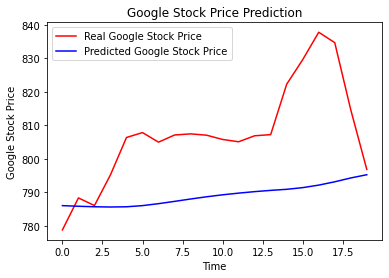

In [9]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

## FIM